### Import potrebných knižníc

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical

import pandas as pd
import numpy as np

Using TensorFlow backend.


### Import datasetu

In [3]:
stars_data_raw = pd.read_csv("stars_data.csv")

### Prehľad dát

In [4]:
print("Počet riadkov: ", stars_data_raw.shape[0])
print("Počet stĺpcov: ", stars_data_raw.shape[1])
print("Názvy stĺpcov: ", stars_data_raw.columns)

Počet riadkov:  240
Počet stĺpcov:  7
Názvy stĺpcov:  Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


In [5]:
print("Prvých 10 riadkov datasetu: \n")
print(stars_data_raw.head(10))
print("Posledných 10 riadkov datasetu: \n")
print(stars_data_raw.tail(10))

Prvých 10 riadkov datasetu: 

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   
5             2840          0.000650        0.1100                   16.98   
6             2637          0.000730        0.1270                   17.22   
7             2600          0.000400        0.0960                   17.40   
8             2650          0.000690        0.1100                   17.45   
9             2700          0.000180        0.1300                   16.05   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red      

## Definovanie vstupných parametrov
##### Stĺpce Luminosity, Radius a Absolute Magnitude ako vstup "train_x" a stĺpec Star type ako očakávaný výstup "train_y"

In [6]:
train_x = stars_data_raw.iloc[:,1:4].values
train_y = stars_data_raw.iloc[:, 4].values
# Prevedenie výstupu na kategorickú premennú
categorical = np_utils.to_categorical(train_y)

### Zadefinovanie prvého modelu
#### 3 vstupné parametre, 3 skryté vrstvy po 50 neurónov a 6 neurónov na výstupe, všetky vrstvy majú aktivačnú funkciu sigmoid

In [7]:
model = Sequential()
model.add(Dense(50, input_dim=3, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(6, activation = 'sigmoid'))

### Kompilácia modelu
#### loss funkcia = mean_squared_error, optimizer = sgd

In [8]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

### Testovanie siete
#### Nasledujúci kód otestuje siet 20 krát
V každom kroku sa sieť vytrénuje a otestuje, všetky výsledné úspešnosti sa uložia a vypíše sa max a min hodnota

In [9]:
hodnoty=[]
# zbehnutie siete 20 krat
# ulozime vysledne skora
for _ in range(20):
    model.fit(train_x, categorical)
    scores = model.evaluate(train_x, categorical)
    hodnoty.append(scores[1]*100)

# vypisanie maximalneho a minimalneho skora uspesnosti siete
print("Maximálne skóre: {:.2f}%".format(max(hodnoty)))
print("Minimálne skóre: {:.2f}%".format(min(hodnoty)))

Epoch 1/1
240/240 [==============================] - 0s 875us/step
Epoch 1/1
240/240 [==============================] - 0s 100us/step
Epoch 1/1
240/240 [==============================] - 0s 99us/step
Epoch 1/1
240/240 [==============================] - 0s 145us/step
Epoch 1/1
240/240 [==============================] - 0s 137us/step
Epoch 1/1
240/240 [==============================] - 0s 145us/step
Epoch 1/1
240/240 [==============================] - 0s 150us/step
Epoch 1/1
240/240 [==============================] - 0s 105us/step
Epoch 1/1
240/240 [==============================] - 0s 134us/step
Epoch 1/1
240/240 [==============================] - 0s 141us/step
Epoch 1/1
240/240 [==============================] - 0s 188us/step
Epoch 1/1
240/240 [==============================] - 0s 135us/step
Epoch 1/1
240/240 [==============================] - 0s 117us/step
Epoch 1/1
240/240 [==============================] - 0s 141us/step
Epoch 1/1
240/240 [==============================] - 0s 160us/s

Maximálne skóre: 16.67%
Minimálne skóre: 16.67%

Príliš nízke hodnoty

#### 3.5. 2020 Zvýšenie počtu iteracií učenia (atribút epochs v metóde fit)
Znova otestujeme na 20 pokusoch

In [10]:
hodnoty = []

for _ in range(20):
    # pocet epoch nastavime na 5
    model.fit(train_x, categorical, epochs=5)
    scores = model.evaluate(train_x, categorical)
    hodnoty.append(scores[1]*100)

# vypisanie maximalneho a minimalneho skora uspesnosti siete
print("Maximálne skóre: {:.2f}%".format(max(hodnoty)))
print("Minimálne skóre: {:.2f}%".format(min(hodnoty)))

Epoch 1/5
240/240 [==============================] - 0s 238us/step - loss: 0.1986 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 270us/step - loss: 0.1956 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 189us/step - loss: 0.1927 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 219us/step - loss: 0.1900 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 108us/step
Epoch 1/5
240/240 [==============================] - 0s 249us/step - loss: 0.1850 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 282us/step - loss: 0.1827 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 233us/step - loss: 0.1805 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 246us/step - loss: 0.1785 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 153us/step
Epoch 1/5
240/240 [==============================] - 0s 24

240/240 [==============================] - 0s 236us/step - loss: 0.1414 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 169us/step
Epoch 1/5
240/240 [==============================] - 0s 234us/step - loss: 0.1412 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 1s 4ms/step - loss: 0.1411 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 197us/step - loss: 0.1411 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 177us/step - loss: 0.1410 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 91us/step
Epoch 1/5
240/240 [==============================] - 0s 202us/step - loss: 0.1408 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 186us/step - loss: 0.1407 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 299us/step - loss: 0.1406 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 217us/step - lo

Po zvýšení počtu epoch na 5 sa nám podarilo v niektorých prípadoch zvýšiť úspešnosť siete, avšak nie na dostatočne vysokú hodnotu. Z tohto poznatku nám však vyplýva že zvýšenie počtu epoch nám môže v optimálnej sieti priniesť vyššiu úspešnosť. Výslednú úspešnosť ovplyvňuje aj aktivačná funkcia alebo loss funkcia. V ďalšej časti sa pokúsime zvýšiť počet neúrónov v skrytých vrstvách.

#### 3.5. 2020 Ponechanie predchadzajuceho procesu trenovania so zmenenou strukturou siete
(3 vstupy, 3 skryté vrstvy po 100 neurónoch a 6 výstupov) aktivačnu funkciu nateraz nechávame rovnakú teda sigmoid, rovnako aj atribúty  metódy compile

In [11]:
model2 = Sequential()
model2.add(Dense(100, input_dim=3, activation='sigmoid')) #vstupna vrstva
model2.add(Dense(100, activation='sigmoid')) # skryta vrstva
model2.add(Dense(100, activation='sigmoid')) # skryta vrstva
model2.add(Dense(6, activation = 'sigmoid')) # vystupne neurony
model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
hodnoty=[]

for _ in range(50):
    # pocet epoch nastavime na 5
    model2.fit(train_x, categorical, epochs=5)
    scores = model.evaluate(train_x, categorical)
    hodnoty.append(scores[1]*100)
    
# vypisanie maximalneho a minimalneho skora uspesnosti siete
print("Maximálne skóre: {:.2f}%".format(max(hodnoty)))
print("Minimálne skóre: {:.2f}%".format(min(hodnoty)))

Epoch 1/5
240/240 [==============================] - 1s 3ms/step - loss: 0.2280 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 268us/step - loss: 0.2202 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 263us/step - loss: 0.2129 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 246us/step - loss: 0.2062 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 201us/step
Epoch 1/5
240/240 [==============================] - 0s 299us/step - loss: 0.1943 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 246us/step - loss: 0.1891 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 286us/step - loss: 0.1845 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 159us/step - loss: 0.1803 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 181us/step
Epoch 1/5
240/240 [==============================] - 0s 348u

240/240 [==============================] - 0s 306us/step - loss: 0.1394 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 179us/step
Epoch 1/5
240/240 [==============================] - 0s 365us/step - loss: 0.1393 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 310us/step - loss: 0.1393 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 205us/step - loss: 0.1392 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 184us/step - loss: 0.1392 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 148us/step
Epoch 1/5
240/240 [==============================] - 0s 257us/step - loss: 0.1391 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 266us/step - loss: 0.1391 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 278us/step - loss: 0.1391 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 218us/step -

240/240 [==============================] - 0s 239us/step - loss: 0.1383 - accuracy: 0.3333
Epoch 2/5
240/240 [==============================] - 0s 241us/step - loss: 0.1383 - accuracy: 0.3333
Epoch 3/5
240/240 [==============================] - 0s 191us/step - loss: 0.1383 - accuracy: 0.3333
Epoch 4/5
240/240 [==============================] - 0s 134us/step - loss: 0.1383 - accuracy: 0.3333
Epoch 5/5
240/240 [==============================] - 0s 116us/step
Epoch 1/5
240/240 [==============================] - 0s 207us/step - loss: 0.1383 - accuracy: 0.3333
Epoch 2/5
240/240 [==============================] - 0s 199us/step - loss: 0.1383 - accuracy: 0.3333
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: 0.1383 - accuracy: 0.28 - 0s 210us/step - loss: 0.1383 - accuracy: 0.3333
Epoch 4/5
240/240 [==============================] - 0s 222us/step - loss: 0.1383 - accuracy: 0.3333
Epoch 5/5
240/240 [==============================] - 0s 77us/step
Epoch 1/5
240/240 [========

240/240 [==============================] - 0s 257us/step - loss: 0.1380 - accuracy: 0.3333
Epoch 4/5
240/240 [==============================] - 0s 245us/step - loss: 0.1380 - accuracy: 0.3333
Epoch 5/5
240/240 [==============================] - 0s 203us/step
Epoch 1/5
240/240 [==============================] - 0s 368us/step - loss: 0.1380 - accuracy: 0.3333
Epoch 2/5
240/240 [==============================] - 0s 320us/step - loss: 0.1380 - accuracy: 0.3333
Epoch 3/5
240/240 [==============================] - 0s 175us/step - loss: 0.1380 - accuracy: 0.3333
Epoch 4/5
240/240 [==============================] - 0s 285us/step - loss: 0.1380 - accuracy: 0.3333
Epoch 5/5
240/240 [==============================] - 0s 56us/step
Epoch 1/5
240/240 [==============================] - 0s 329us/step - loss: 0.1380 - accuracy: 0.3333
Epoch 2/5
240/240 [==============================] - 0s 309us/step - loss: 0.1380 - accuracy: 0.3333
Epoch 3/5
240/240 [==============================] - 0s 166us/step - 

Zvýšenie počtu neurónov v skrytých vrstvách nám pomohlo s konzistentnosťou našej siete, pretože sme pravidelnejšie dosahovali maximálnu hodnotu úspešnosti ďalej by bolo dobré sa zamerať na vhodnejšie aktivačné funkcie alebo optimizer a loss funkciu

#### Skúšanie rôznych optimizerov
Použijeme model2 bez zmien vo vrstvách
Použité optimizery: sgd, rmsprop, adam, nadam, adagrad, adadelta, adamax

In [12]:
def do_cycle():
    # pocet epoch nastavime na 5
    history = model2.fit(train_x, categorical, epochs=15)
    scores = model.evaluate(train_x, categorical)
    return history

model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
historysgd = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
historyrmsprop = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
historyadam = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='nadam', metrics=['accuracy'])
historynadam = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='adagrad', metrics=['accuracy'])
historyadagrad = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['accuracy'])
historyadadelta = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='adamax', metrics=['accuracy'])
historyadamax = do_cycle()

Epoch 1/15
240/240 [==============================] - 1s 3ms/step - loss: 0.1379 - accuracy: 0.3333
Epoch 2/15
240/240 [==============================] - 0s 238us/step - loss: 0.1379 - accuracy: 0.3333
Epoch 3/15
240/240 [==============================] - 0s 196us/step - loss: 0.1378 - accuracy: 0.3333
Epoch 4/15
240/240 [==============================] - 0s 162us/step - loss: 0.1378 - accuracy: 0.3333
Epoch 5/15
240/240 [==============================] - 0s 316us/step - loss: 0.1378 - accuracy: 0.3333
Epoch 6/15
240/240 [==============================] - 0s 215us/step - loss: 0.1378 - accuracy: 0.3333
Epoch 7/15
240/240 [==============================] - 0s 297us/step - loss: 0.1378 - accuracy: 0.3333
Epoch 8/15
240/240 [==============================] - 0s 294us/step - loss: 0.1378 - accuracy: 0.3333
Epoch 9/15
240/240 [==============================] - 0s 199us/step - loss: 0.1378 - accuracy: 0.3333
Epoch 10/15
240/240 [==============================] - 0s 171us/step - loss: 0.1378 

240/240 [==============================] - 0s 356us/step - loss: 0.0876 - accuracy: 0.5000
Epoch 4/15
240/240 [==============================] - 0s 330us/step - loss: 0.0879 - accuracy: 0.4875
Epoch 5/15
240/240 [==============================] - 0s 322us/step - loss: 0.0878 - accuracy: 0.4583
Epoch 6/15
240/240 [==============================] - 0s 344us/step - loss: 0.0874 - accuracy: 0.4667
Epoch 7/15
240/240 [==============================] - 0s 392us/step - loss: 0.0873 - accuracy: 0.4958
Epoch 8/15
240/240 [==============================] - 0s 267us/step - loss: 0.0876 - accuracy: 0.4708
Epoch 9/15
240/240 [==============================] - 0s 322us/step - loss: 0.0875 - accuracy: 0.4917
Epoch 10/15
240/240 [==============================] - 0s 396us/step - loss: 0.0879 - accuracy: 0.4667
Epoch 11/15
240/240 [==============================] - 0s 482us/step - loss: 0.0873 - accuracy: 0.4750
Epoch 12/15
240/240 [==============================] - 0s 229us/step - loss: 0.0872 - accur

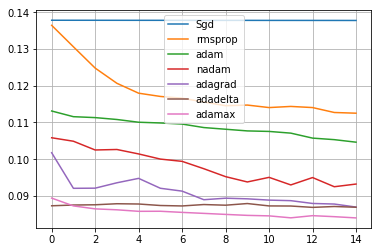

In [37]:
import matplotlib.pyplot as plt

plt.plot(historysgd.history['loss'], label="Sgd")
plt.plot(historyrmsprop.history['loss'], label="rmsprop")
plt.plot(historyadam.history['loss'], label="adam")
plt.plot(historynadam.history['loss'], label="nadam")
plt.plot(historyadagrad.history['loss'], label="adagrad")
plt.plot(historyadadelta.history['loss'], label="adadelta")
plt.plot(historyadamax.history['loss'], label="adamax")
plt.grid()
plt.legend()

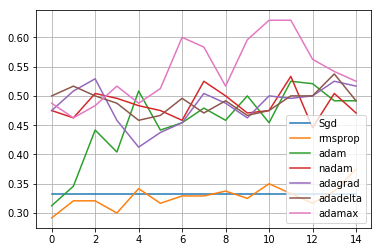

In [14]:
plt.plot(historysgd.history['accuracy'], label="Sgd")
plt.plot(historyrmsprop.history['accuracy'], label="rmsprop")
plt.plot(historyadam.history['accuracy'], label="adam")
plt.plot(historynadam.history['accuracy'], label="nadam")
plt.plot(historyadagrad.history['accuracy'], label="adagrad")
plt.plot(historyadadelta.history['accuracy'], label="adadelta")
plt.plot(historyadamax.history['accuracy'], label="adamax")
plt.grid()
plt.legend()

#### 6.5.2020 Vizualizácia optimizerov
##### Na vyššie uvedených grafoch vidíme že ako najlepší optimizer sa javí adamax, nahradili sme ním optimizer adam, ktorý sme používali v našej výslednej sieti

## 5.5. 2020 Uprava datasetu, prehodnotenie vstupnych parametrov X a y
Hviezdy vieme klasifikovat na základe parametrov Luminosity(1), Spectral class(6), Magnitude(3) a Temperature(0).
Môzeme si dopomôct aj parametrom Star color(5), ktorý však máme definovaný ako string a je potrebné ho prekonvertovat na numerickú hodnotu.
Rovnako budeme musieť prekonvertovať aj parameter Spectral class

Konvertovanie stĺpcu Star color

In [15]:
stars_dict = {}
i = 0
for _, row in stars_data_raw['Star color'].iteritems():
    farba = row.lower().replace(" ", "").replace("-", "")
    if farba not in stars_dict.keys():
        stars_dict[farba] = i
        i = i+1

for i, row in stars_data_raw['Star color'].iteritems():
    farba = row.lower().replace(" ", "").replace("-", "")
    stars_data_raw.at[i, 'Star color'] = stars_dict[farba]

Konvertovanie stĺpcu Spectral class

In [16]:
spectral_dict = {}
i = 0
for _, c in stars_data_raw['Spectral Class'].iteritems():
    if c not in spectral_dict.keys():
        spectral_dict[c] = i
        i = i+1
for i, row in stars_data_raw['Spectral Class'].iteritems():
    stars_data_raw.at[i, 'Spectral Class'] = spectral_dict[row] 

In [17]:
X = stars_data_raw.iloc[:,[0,1,3,5,6]].values
y = stars_data_raw.iloc[:, 4].values
categorical_y = np_utils.to_categorical(y)

### Dáta sme nerozdelili na trénovacie a testovacie z dôvodu nízkeho počtu riadkov v datasete (240)

Náš nový model obsahuje 5 vstupných neurónov, 3 skryté vrstvy po 100 neurónov s aktivačnou funkciou relu (vhodná pre klasifikáciu) a 6 výstupných neurónov (podľa kategorickej premennej) s aktivačnou funkciou softmax

In [48]:
nn_model = Sequential()
nn_model.add(Dense(100, input_dim=5, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(units=6, activation='softmax'))

Použili sme optimizer adam a loss funkciu categorical_crossentropy, ktorá je vhodná pri použití to_categorical na výstupných dátach

Model trénujeme na 150 iteráciách a testujeme na celom datasete (z dôvodu nízkeho počtu dostupných dát)


### 6.5.2020 Po preskúšaní rôznych optimizerov sme sa rozhodli pre optimizer adamax, zamenili sme ho za optimizer adam

In [61]:
nn_model.compile(optimizer="adamax", loss='categorical_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X, categorical_y, epochs=150, validation_split=0.20, shuffle=True)
nn_scores = nn_model.evaluate(X, categorical_y)

Train on 192 samples, validate on 48 samples
Epoch 1/150
192/192 [==============================] - 1s 6ms/step - loss: 2.5982 - accuracy: 0.5156 - val_loss: 2.2342 - val_accuracy: 0.7083
Epoch 2/150
192/192 [==============================] - 0s 424us/step - loss: 1.0644 - accuracy: 0.6302 - val_loss: 2.3400 - val_accuracy: 0.6042
Epoch 3/150
192/192 [==============================] - 0s 495us/step - loss: 1.0889 - accuracy: 0.6927 - val_loss: 1.6023 - val_accuracy: 0.5417
Epoch 4/150
192/192 [==============================] - 0s 547us/step - loss: 0.5247 - accuracy: 0.8177 - val_loss: 1.1298 - val_accuracy: 0.4792
Epoch 5/150
192/192 [==============================] - 0s 455us/step - loss: 0.5692 - accuracy: 0.7865 - val_loss: 0.9285 - val_accuracy: 0.7292
Epoch 6/150
192/192 [==============================] - 0s 404us/step - loss: 0.5604 - accuracy: 0.8073 - val_loss: 1.5016 - val_accuracy: 0.7917
Epoch 7/150
192/192 [==============================] - 0s 362us/step - loss: 0.5754 - a

192/192 [==============================] - 0s 636us/step - loss: 0.2649 - accuracy: 0.8854 - val_loss: 0.9952 - val_accuracy: 0.6875
Epoch 57/150
192/192 [==============================] - 0s 362us/step - loss: 0.2513 - accuracy: 0.8646 - val_loss: 0.8805 - val_accuracy: 0.7917
Epoch 58/150
192/192 [==============================] - ETA: 0s - loss: 0.3999 - accuracy: 0.78 - 0s 431us/step - loss: 0.3029 - accuracy: 0.8490 - val_loss: 0.9395 - val_accuracy: 0.7708
Epoch 59/150
192/192 [==============================] - 0s 411us/step - loss: 0.2549 - accuracy: 0.8854 - val_loss: 0.8652 - val_accuracy: 0.6458
Epoch 60/150
192/192 [==============================] - 0s 712us/step - loss: 0.2772 - accuracy: 0.8750 - val_loss: 1.0801 - val_accuracy: 0.7917
Epoch 61/150
192/192 [==============================] - 0s 647us/step - loss: 0.2463 - accuracy: 0.8802 - val_loss: 0.7553 - val_accuracy: 0.7500
Epoch 62/150
192/192 [==============================] - 0s 419us/step - loss: 0.2362 - accuracy

Epoch 112/150
192/192 [==============================] - 0s 537us/step - loss: 0.3075 - accuracy: 0.8646 - val_loss: 1.1548 - val_accuracy: 0.7708
Epoch 113/150
192/192 [==============================] - 0s 490us/step - loss: 0.2467 - accuracy: 0.8750 - val_loss: 0.9681 - val_accuracy: 0.7708
Epoch 114/150
192/192 [==============================] - 0s 557us/step - loss: 0.2598 - accuracy: 0.8646 - val_loss: 0.7834 - val_accuracy: 0.7708
Epoch 115/150
192/192 [==============================] - 0s 497us/step - loss: 0.2668 - accuracy: 0.8698 - val_loss: 0.9556 - val_accuracy: 0.7083
Epoch 116/150
192/192 [==============================] - 0s 551us/step - loss: 0.3175 - accuracy: 0.8490 - val_loss: 1.2610 - val_accuracy: 0.7917
Epoch 117/150
192/192 [==============================] - 0s 509us/step - loss: 0.2963 - accuracy: 0.8646 - val_loss: 0.6133 - val_accuracy: 0.7292
Epoch 118/150
192/192 [==============================] - 0s 485us/step - loss: 0.3726 - accuracy: 0.8021 - val_loss: 1

In [62]:
print("Výsledné skóre testovania neurónovej sieťe: {:.2f}% ".format(nn_scores[1]*100))

Výsledné skóre testovania neurónovej sieťe: 84.17% 


# Vizualizácia

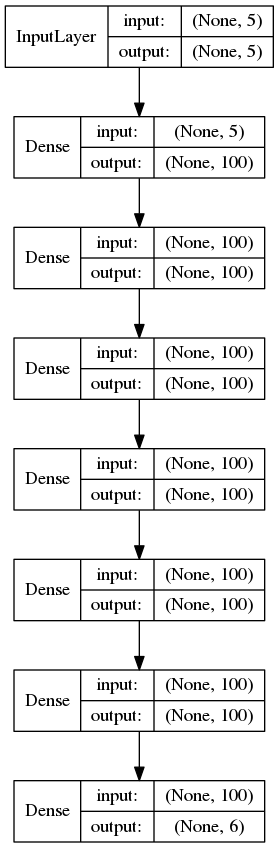

In [63]:
from keras.utils import plot_model
plot_model(nn_model, to_file='nn_model.png', show_shapes=True, show_layer_names=False, expand_nested=False)

In [22]:
import matplotlib.pyplot as plt

In [23]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

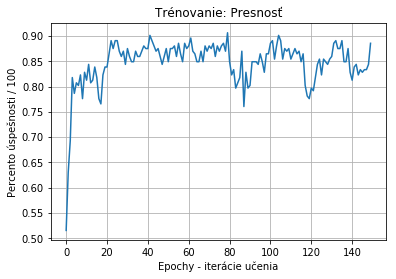

In [64]:
plt.plot(history.history['accuracy'])
plt.title("Trénovanie: Presnosť")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Percento úspešnosti / 100")
plt.grid()

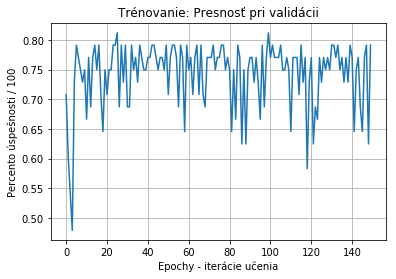

In [65]:
plt.plot(history.history['val_accuracy'])
plt.title("Trénovanie: Presnosť pri validácii")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Percento úspešnosti / 100")
plt.grid()

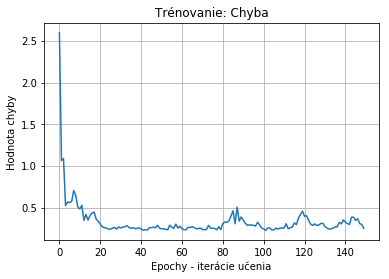

In [66]:
plt.plot(history.history['loss'])
plt.title("Trénovanie: Chyba")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Hodnota chyby")
plt.grid()

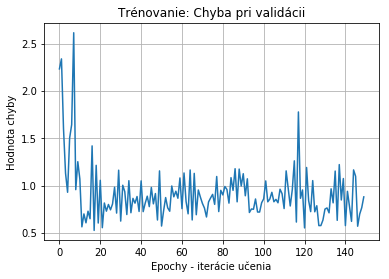

In [67]:
plt.plot(history.history['val_loss'])
plt.title("Trénovanie: Chyba pri validácii")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Hodnota chyby")
plt.grid()